# **Iris Flower Classifier**

---




**Overview**

Iris flower has three (3) species - Setosa, Versicolor, and Virginica. They differ according to their measurements, i.e., sepal length, sepal width, petal length, and petal width.

**Goal**

To classify a sample Iris flower from the provided measurements according to the species by training an ML model that can learn from the given dataset and do the classification.

**Dataset:** https://www.kaggle.com/datasets/saurabh00007/iriscsv

# **Importing Necessary Libraries**

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

# **Loading the Dataset**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/My Drive/Iris.csv'
df = pd.read_csv(file_path)

In [8]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# **Identifying and Handling Missing Values**

In [9]:
# Check for missing values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# **Data Visualization**

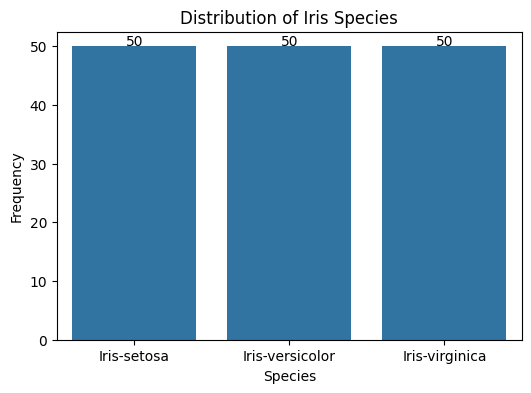

In [28]:
# Bar plot: Class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Species', data=df)
plt.title("Distribution of Iris Species")
plt.ylabel("Frequency")

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 0.2,
            s=f'{int(height)}',
            ha='center')

plt.show()

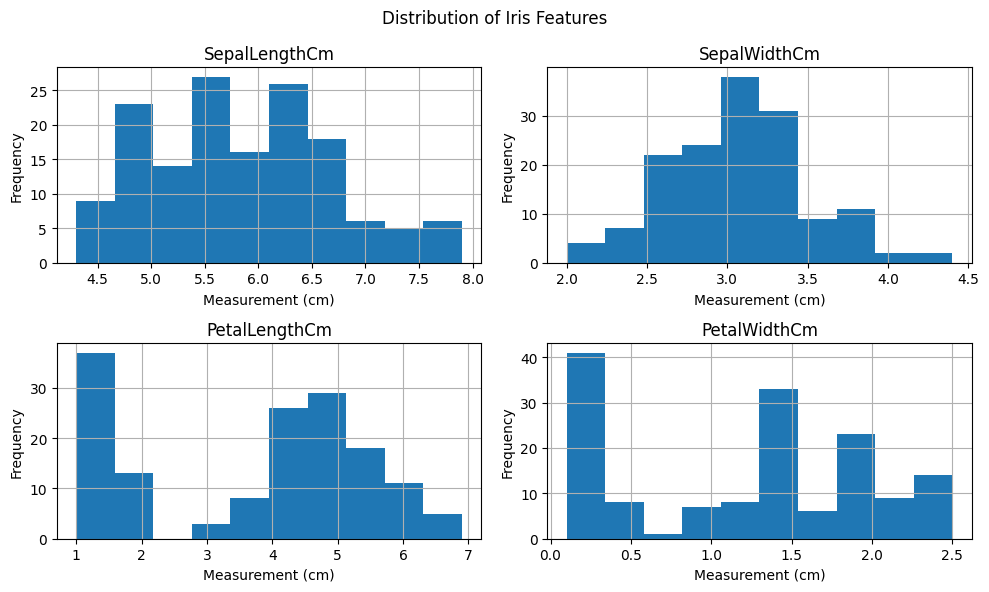

In [16]:
# Histogram: Feature distribution
axes = df.drop("Id", axis=1).hist(figsize=(10, 6))
plt.suptitle("Distribution of Iris Features")

for ax in axes.ravel():
    ax.set_xlabel("Measurement (cm)")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# **Preparing Features and Target**

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'Species' column into numeric labels
le = LabelEncoder()
df['target'] = le.fit_transform(df['Species'])

# Selecting feature columns
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['target']

# **Splitting Data and Scaling Features**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Training a Random Forest (RF) Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# **Evaluating the Model**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_pred = clf.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



# **Performance Metrics Visualization**

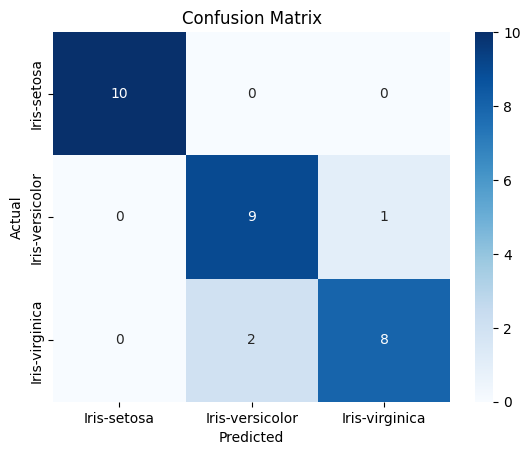

In [29]:
# Heatmap: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

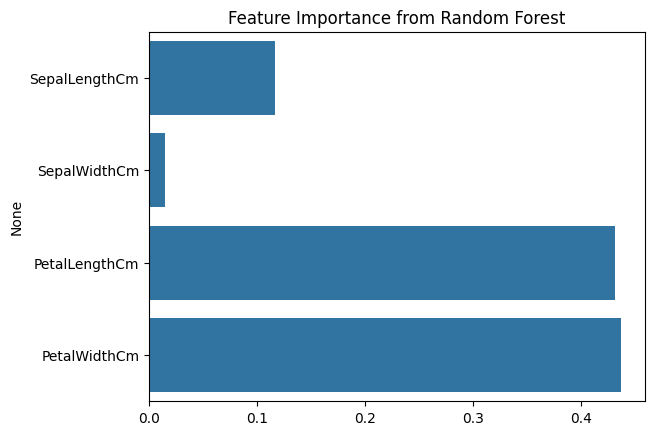

In [24]:
# Bar plot: Feature importance
importances = clf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance from Random Forest")
plt.show()

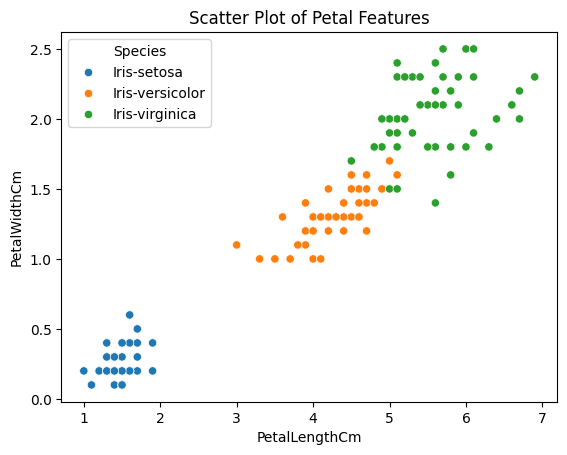

In [26]:
# Scatter plot: Visualizing class clusters for petal features
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title("Scatter Plot of Petal Features")
plt.show()

# **Classifying from Sample Measurements**

In [27]:
# Sample for prediction
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

# Scaling using the same scaler
sample_scaled = scaler.transform(sample)

# Predicting the Iris class
predicted_class_index = clf.predict(sample_scaled)[0]
predicted_class_label = le.inverse_transform([predicted_class_index])[0]

print(f"Predicted Species: {predicted_class_label}")

Predicted Species: Iris-setosa
